In [1]:
%matplotlib inline

import matplotlib.pyplot as plt;
import sympy as sp;

sp.init_printing()

<a name="TOC"></a>

# Table of Contents
***
***
1. [Chapter Summary](#CS)
 1. [Stiffness Matrix for a bar element in Local Coordinates](#CS_stiff)
 1. [Shape Functions](#CS_shape)
 1. [Vector Transformations for a bar in 2D](#CS_trans2d)
 1. [Stiffness Matrix for a bar in 2D](#CS_stiff2d)
 1. [Stress calculations for a bar in 2D](#CS_stress2d)
 1. [Vector Transformations for a bar in 3D](#CS_trans3d)
 1. [Stress calculations for a bar in 3D](#CS_stress3d)
 1. [Inclined/Skewed constraints](#CS_cnstrnt)
 1. [Potential Energy Approach](#CS_pe)
 1. [Galerkin's Residual Method to derive 1D bar element equation](#CS_galerkin)
 1. [Review of other Residual Methods](#CS_residual)
2. [Problems](#Prob)
 1. [3.1](#Prob_31)
 1. [3.13](#Prob_313)
 1. [3.15](#Prob_315)
 1. [3.16](#Prob_316)
 1. [3.20](#Prob_320)
 1. [3.21](#Prob_321)
 1. [3.42](#Prob_342)
 1. [3.49](#Prob_349)
3. [Simulations](#Sim)
  1. [3.20](#Sim_320)
  1. [3.42](#Sim_342)
  1. [3.49](#Sim_349)

<a name="CS"></a>
## Chapter Summary
***

<a name="CS_stiff"></a>
### Stiffness Matrix for a bar element in Local Coordinates

The bar, or truss, is considered to be have a constant cross sectional area $A$, has a length of $L$, and is only capable of resisting axial deflections caused by tensile force $T$ and therefore gives us the ability to approximate tensile stresses $\sigma$; to calculate these fields, the bar will be made of a linear elastic material with a modulus of elasticity $E$ that allows conversions between the tensile stress and strains $\epsilon$. The previous chapters considered idealized springs which resisted axial deflections but did not have stress since there was no cross sectional area to distribute the force over.<br>
To begin, let's define axial stress $\sigma_x$ as the distribution of the tensile force $T$ at a node of the bar element over the bar's cross sectional area $A$.

$$\sigma = \frac{T}{A}$$<br>
Next, we relate the axial strain of the bar $\epsilon_x$ to $\sigma_x$ using Hooke's law and the modulus of elasticity of the bar's material, $E$.

$$\sigma_x = E\epsilon_x$$<br>
The axial strain of the bar is defined by the change in length of the bar element over the original length of the bar element. 

$$\epsilon_x = \frac{du}{dx}$$<br>
We can now combine the above equations and solve for the nodal force to get closer to the format used in the previous chapters.

$$ T = EA\frac{du}{dx}$$<br>
Initial considerations of a bar will only have loads applied at the nodes which yields the property that the change in stress of the bar along it's length is 0.

$$\frac{d}{dx}\biggl(EA\frac{du}{dx}\biggr) = 0$$<br>
Neither the cross sectional area, nor the modulus of elasticity have been taken out of the derivative in preparation for a time when the cross sectional area and/or material property varies along the length of the bar element.
<br><br>
[TOC](#TOC)


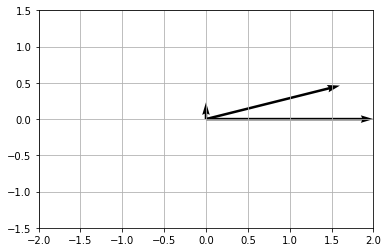

In [39]:
plt.quiver(0,0, 1, 0, scale=2);
plt.quiver(0,0,0,1, scale=20);
plt.quiver(0,0, 0.8, .2, scale=2);
plt.grid()
plt.xlim(-2,2);
plt.ylim(-1.50,1.50);
plt.show()

<a name="CS_shape"></a>
### Shape Functions

The matrix equations allow for the approximation of the field equations at nodes. It is often necessary to approximate one of the field values at a some location that is in/on an element but is in between the end nodes. To do this, we requiquire an interpolation equation that blends the value of a field variable between all pertinent nodes. In the case of the bar element, we need a way of approximating the displacement at any location on the element. To do this, we assume a displacement function for our element as

$$u(x) = a_0 + a_1x$$<br>
In general, the displacement functions has as many constants as the element has Degrees of Freedom (DOF). If our bar element had an intermediate node, then our assumed displacement function would be $u(x) = a_0 + a_1x + a_2x^2$. To determine the values of the constants, we enforce the "boundary conditions" of the bar element that $u(0)=u_0$ and $u(L) = u_1$

$$u(0) = u_0 = a_1$$<br>
$$u(L) = u_1 = u_0 + a_1L \implies a_1 = \frac{u_1-u_0}{L}$$
$$u(x) = u_0 + \frac{u_1-u_0}{L}x$$
$$u(x) = u_0(1-\frac{x}{L}) + u_1(\frac{x}{L})$$
$$u(x) = \begin{bmatrix}1-\frac{x}{L} & \frac{x}{L}\end{bmatrix}\begin{bmatrix}u_0\\u_1\end{bmatrix}$$
$$u(x) = \begin{bmatrix}N_0 & N_1\end{bmatrix}\begin{bmatrix}u_0\\u_1\end{bmatrix}\ \  where\ N_0 = 1-\frac{x}{L}\ \  and\ \  N_1 = \frac{x}{L}$$<br>
$N_0$ and $N_1$ are called shape functions and they contain the following properties:
1. Must be continuous within the bar element
2. Shape functions between two elements which share a node must conform with eachother. This prevents two elements from seperating or overlapping at the node. This property of the shape functions is the reason they are sometimes reffered to as *conforming* or *compatibility* functions. This basic assumption is critical to FEA and allows the information from one element to pass to the next element.
3. Must allow for rigid body motion; consequently, the shape functions of an element must sum to be zero. In the case of the bar element, if $u_0$ and $u_1$ are equal, then $u(x) = 1$

[TOC](#TOC)

<a name="CS_trans2d"></a>
### Vector Transformations for a bar in 2D

![alt text](FEM_ch3_2d_rotation.png "Rotation of coordinate system in 2D")

For Reasons that will become apparant later, we need a way of jumping between the global coordinate system, which has $\boldsymbol{i}$ and $\boldsymbol{j}$ unit vectors aligned with the global x and y axis, and the local coordinate system, which has $\boldsymbol{i}'$ and $\boldsymbol{j}'$ unit vectors with the $\boldsymbol{i}'$ unit vector aligned with the axis of the bar element and the $\boldsymbol{j}'$ unit vector perpendicular to the axis. In the 2D case, lets assume that the local coordinate system has been rotated by an $\theta$ radians from the global coordinate system. We can then define the local unit vectors as some combination of sines and cosines of the global unit vectors as.

$$ \boldsymbol{i}' = \boldsymbol{i} \cos{\theta} + \boldsymbol{j} \sin{\theta}$$
$$ \boldsymbol{j}' = -\boldsymbol{i} \sin{\theta} + \boldsymbol{j} \cos{\theta}$$<br>
writing in matrix notation we get

$$\begin{bmatrix} \boldsymbol{i}' \\ \boldsymbol{j}' \end{bmatrix} = 
\begin{bmatrix} \cos{\theta} & \sin{\theta} \\ -\sin{\theta} & \cos{\theta} \end{bmatrix}
\begin{bmatrix}\boldsymbol{i} \\ \boldsymbol{j} \end{bmatrix}$$<br>
In shorthand notation we write

$$\begin{bmatrix} \boldsymbol{i}' \\ \boldsymbol{j}' \end{bmatrix} = 
\begin{bmatrix} C & S \\ -S & C \end{bmatrix}
\begin{bmatrix}\boldsymbol{i} \\ \boldsymbol{j} \end{bmatrix}$$<br><br>
where $C = \cos{\theta}$ and $S=\sin{\theta}$. This *transformation*, or *rotation*, *matrix* can be used on transfer any vector quantity from the local coordinate system, or basis, to the global coordinate system or vice-versa. It is left to the reader to investigate the interesting relationship between the inverse and trasnpose of the transformation matrix; this odd but useful property is a result of the rotation matrix being orthogonal.<br>


[TOC](#TOC)

<a name="CS_stiff2d"></a>
### Stiffness matrix for a bar in 2D

In the case of the stiffness matrix, lets analyze a bar element oriented at an angle $\theta$ relative to the global coordinate system. In the local coordinate system, we express the system of equations as

$$ \begin{bmatrix}f_1' \\ f_2' \end{bmatrix} = 
\begin{bmatrix}k & -k \\ -k & k \end{bmatrix}
\begin{bmatrix}u_1' \\ u_2' \end{bmatrix}
\implies
\boldsymbol{f}' = \boldsymbol{k}' \boldsymbol{d}'$$<br>
To determine the transformation matrix, we look at the displacement vectors and see that

$$u_1' = u_1 C + v_1 S$$
$$u_2' = u_2 C + v_2 S$$<br>
yielding the equation

$$\begin{bmatrix} u_1' \\ u_2' \end{bmatrix} = 
\begin {bmatrix} C & S & 0 & 0 \\ 0 & 0 & C & S \end{bmatrix}
\begin{bmatrix}u_1 \\ v_1 \\ u_2 \\ v_2 \end{bmatrix}$$<br>
or more conciseley

$$ \boldsymbol{d}' = \boldsymbol{T}^* \boldsymbol{d}$$<br>
The * is used to indicate that the transformation is incomplete/incorrect for reasons that will be apparent later. This equation can be substituted into the system of equations for the local coordinate system and yields

$$ \boldsymbol{f}' = \boldsymbol{k}' \boldsymbol{T}^* \boldsymbol{d}$$<br>
similarly 

$$\begin{bmatrix}f_1' \\ f_2' \end{bmatrix} = 
\boldsymbol{T}^*
\begin{bmatrix}f_{1x} \\ f_{1y} \\ f_{2x} \\ f_{2y} \end{bmatrix} 
\implies
\boldsymbol{f}' = \boldsymbol{T}^* \boldsymbol{f}
$$<br>
which can also be substituted into the previous equation yielding

$$\boldsymbol{T}^* \boldsymbol{f} = \boldsymbol{k}' \boldsymbol{T}^* \boldsymbol{d}$$<br>
Though this system of equations is technically true, it yields an immediate issue if one tries to solve for $\boldsymbol{d}$ as has been done in previous sections; the transformation matrix $\boldsymbol{T}^*$ is not square and is therefore non-invertible. To rectify this, the entire system of equation must be expanded to include $v_1'$, $v_2'$, $f_1'$, and $f_2'$ in the original system of equations even though they must all come to be 0. This activity is left to the reader, for which they should reference the derivation in the "Vector Transformation for a bar in 2D" section. We find the correct transformation matrix to be

$$ \boldsymbol{T} = 
\begin{bmatrix}C & S & 0 & 0 \\ -S & C & 0 & 0 \\ 0 & 0 & C & S \\ 0 & 0 & -S & C \end{bmatrix}$$<br>
which gives the displacement transformation of

$$ \begin{bmatrix}u_1' \\ v_1' \\ u_2' \\ v_2' \end{bmatrix} = 
\boldsymbol{T}
\begin{bmatrix} u_1 \\ v_1 \\ u_2 \\ v_2 \end{bmatrix}$$<br>

$$ \begin{bmatrix}f_1' \\ f_1' \\ f_2' \\ f_2' \end{bmatrix} = 
\boldsymbol{T}
\begin{bmatrix} f_{1x} \\ f_{1y} \\ f_{2x} \\ f_{2y} \end{bmatrix}$$<br>

Therefore
$$ \boldsymbol{T} \boldsymbol{f} = \boldsymbol{k}' \boldsymbol{T} \boldsymbol{d}$$<br>
$$ \boldsymbol{f} = \boldsymbol{T}^{-1}\boldsymbol{k}' \boldsymbol{T} \boldsymbol{d}$$<br>
$$ \therefore \boldsymbol{f} = \boldsymbol{k}\boldsymbol{d}\ \ where\ \ \boldsymbol{k} = \boldsymbol{T}^T\boldsymbol{k}\boldsymbol{T}$$<br>
[TOC](#TOC)

### Stress Calculations for a bar in 2D

Calculating the stress in a bar element begins with determining the nodal forces on the element. The equation for the forces is repeated here.

$$ \begin{bmatrix} f_1' \\ f_2' \end{bmatrix} =
\frac{A E}{L} \begin{bmatrix} 1 & -1 \\ -1 & 1 \end{bmatrix}
\begin{bmatrix} u_1' \\ u_2' \end{bmatrix} $$<br>
Stress is defined as force over the cross sectional area $\sigma = \frac{f_2'}{A}$. Using the matrix definition above we notice

$$\boldsymbol{\sigma} = \frac{E}{L}
\begin{bmatrix}-1 & 1\end{bmatrix}
\begin{bmatrix}u_1' \\ u_2' \end{bmatrix} = 
\frac{E}{L}
\begin{bmatrix}-1 & 1\end{bmatrix} \boldsymbol{d}'$$<br>
In this case, we used the equation corresponding to $f_2^'$; either equation can be used, but the reader must remember that a positive, or tensile, stress is one which points away from the element under consideration. That is a "possitive" stress will be positive on the right node and negative on the left node. Using the incomplete transformation from the previous section to relate the stress field variable to the global coordinate system we get

$$ \boldsymbol{\sigma} = \frac{E}{L}
\begin{bmatrix}-1 & 1 \end{bmatrix}
\boldsymbol{T}^*\boldsymbol{d}$$<br>

$$ \boldsymbol{\sigma} = \boldsymbol{C}^*\boldsymbol{d}$$<br> 
where
$$\boldsymbol{C}^* = \frac{E}{L}
\begin{bmatrix}-1 & 1 \end{bmatrix}
\begin{bmatrix} C & S & 0 & 0 \\ 0 & 0 & C & S\end{bmatrix} = 
\frac{E}{L}
\begin{bmatrix} -C & -S & C & S \end{bmatrix}$$<br>

In this instance we can use the "incomplete" transformation matrix $T*$ because the system no matrix will need to be inverted or transposed in order to find the variable in question. This should serve as a reminder that, even though the typical output for and FEA is the stress field, we must first solve for the displacement field and then use those results to calculate the stress field.<br>
[TOC](#TOC)

<a name="CS_trans3d"></a>
### Vector Transformations for a bar in 3D

Similar to the work done in the "Vector Transformations for a bar in 2D," we now need to develop a tranfromation, or rotation, matrix which allows us to translate from the bar coordinate system to the global coordinate system. To do this we state

$$ u' \hat{i}' + v' \hat{j}' + w' \hat{k} = u \hat{i} + v \hat{j} + w \hat{k} $$<br>
where the "'" indicates the local coordinate system. If we premultiply the equation by $\hat{i}'$ we get

$$ u' \hat{i}' \dot{} \hat{i}' + v' \hat{i}' \dot{} \hat{j}' + w' \hat{i}' \dot{} \hat{k} = u \hat{i}' \dot{} \hat{i} + v \hat{i}' \dot{} \hat{j} + w \hat{i}' \dot{} \hat{k} $$<br>

Recal that $A \dot{} B = |A||B| \cos{\theta_{AB}} $ where $\theta_{AB}$ is the angle between the A axis and B axis. Also, recall that the local coordinate system for a bar element has the x' axis aligned with the bar element so there is $v'$ or $w'$ displacement values.

$$ u' = u \cos{\theta_x} + v \cos{\theta_y} + w \cos{\theta_z} $$<br>
where $\theta_x$ is the angle between the local and global x axis, $\theta_y$ is the angle between the local x axis and the global y axis, and $\theta_z$ is the angle between the local x axis and the global z axis. Expanding we get

$$\begin{Bmatrix} u_1' \\ u_2' \end{Bmatrix} = 
\begin{bmatrix} C_x & C_y & C_z & 0 & 0 & 0 \\ 0 & 0 & 0 & C_x & C_y & C_z \end{bmatrix}
\begin{Bmatrix} u_1 \\ v_1 \\ w_1 \\ u_2 \\ v_2 \\ w_2 \end{Bmatrix}$$<br>
or more concisely

$$\{d'\} = [T^*] \{d\}$$<br>
and

$$ \{f'\} = [T^*] \{f\} \implies [T^*]^T \{f'\} = \{f\} $$<br>
and

$$ \{f\}' = [K']\{d'\} $$<br>
$$ \{f\}' = [K'][T^*]\{d\}$$<br>
premultiply by $[T*]^T$

$$ [T*]^T\{f\}' = [T*]^T[K'][T^*]\{d\} \implies \{f\} = [T*]^T[K'][T^*]\{d\} $$<br>
$$\therefore [K] = [T^*]^T[K'][T^*]$$
<br>
[TOC](#TOC)

<a name="CS_stress3d"></a>
### Stress Calculations for a bar in 3D

[TOC](#TOC)

<a name="CS_cnstrnt"></a>
### Inclined/Skewed Constraints

[TOC](#TOC)

<a name="CS_pe"></a>
### Potential Energy Approach

Recall from chapter 2 that the stiffness matrix can be derived by minimizing the potential energy function for elements with linear elastic materials. To do this, we must first derive the $U$ and $\Omega$ in the equation $\pi_p = U + \Omega$.<br>

![alt text](./FEM_ch3_pip_diff_elem.png "Differential element used for Potential Energy Derivation of bar element in 2D")<br>

To begin with, we will develop an expression for the internal energy, $U$, by using the differential element above. Starting from the generic understanding that the internal energy is a product of the internal forces and the change in shape, $U = F \Delta L$, we  realize that $F = \sigma\ Area$, $Area = \Delta y \Delta z$, and the change in length $\Delta L$ is the product of the strain on the element $\epsilon_x$ and the elements original length $\Delta x$.

$$ \delta U = \sigma_x \Delta y \Delta z \mathrm{d} \epsilon_x \Delta x = \sigma_x \delta \epsilon_x \mathrm{d}V$$<br>
integrating, we see that

$$ U = \iiint \left( \int_0^{\epsilon_x} \sigma_x \mathrm{d} \epsilon_x \right) \mathrm{d} V $$<br>
For linear elastic material, we know that stress and strain are linearly related by the modulus of elasticity. Realizing that the area under the stress strain curve is $\frac{1}{2}\sigma_x \epsilon_x$ we get

$$ \boldsymbol{U} = \iiint \frac{1}{2} \boldsymbol{\sigma}_x^T \boldsymbol{\epsilon}_x \mathrm{d}  V = \frac{A}{2} \int \boldsymbol{\sigma}_x^T \boldsymbol{\epsilon}_x \mathrm{d}x$$<br>
Next, we will form an expression for the Work done on the element by external forces $\Omega$. With a little thought, we realize that there are 3 ways that external forces can be applied; the standard nodal forces ($P$) which we have dealt with previously, traction forces ($T_s$) which are applied to the surface ($S$) of the element, and lastly body forces ($X_b$) which are applied to the mass of the element. An example of body forces would be the gravity field applied to the mass of the element. An example of traction forces would be friction on one side of the element due to contact with another element. With a little consideration, we see that

$$\Omega = \boldsymbol{u}^T \boldsymbol{P} + \iint_S \boldsymbol{u}_S^T \boldsymbol{T}_S \mathrm{d} S+ \iiint \boldsymbol{u}^T \boldsymbol{X}_b \mathrm{d} V$$<br>
finally, we can express the potential energy of the element as

$$\boldsymbol{\pi}_p = \frac{A}{2} \int \boldsymbol{\sigma}_x^T \boldsymbol{\epsilon}_x \mathrm{d}x - \boldsymbol{u}^T \boldsymbol{P} - \iint_S \boldsymbol{u}_S^T \boldsymbol{T}_S \mathrm{d}S - \iiint \boldsymbol{u}^T \boldsymbol{X}_b \mathrm{d} V$$<br>
from here, we expend some effort to express all terms as a function of the displacement vector $\boldsymbol{d}$. Recall $\boldsymbol{u} = \boldsymbol{N}\boldsymbol{d}$, and logically $\boldsymbol{u}_S = \boldsymbol{N}_S \boldsymbol{d}$ and<br>

$$\boldsymbol{N} = \begin{bmatrix} 1-\frac{x}{L} & \frac{x}{L} \end{bmatrix}$$

$$\epsilon = \frac{\partial{u}}{\partial{x}} \implies \boldsymbol{\epsilon}_x = \frac{\partial}{\partial x} \boldsymbol{N} \boldsymbol{d} = \boldsymbol{B}\boldsymbol{d}$$
where the gradient matrix $\boldsymbol{B}$ is defined as $\boldsymbol{B} = \begin{bmatrix} -\frac{1}{L} & \frac{1}{L} \end{bmatrix}$<br>
Next we use Hooke's law to determine $\boldsymbol{\sigma}$ in terms of the displacement matrix<br>

$$\boldsymbol{\sigma}_x = \boldsymbol{D} \boldsymbol{\epsilon}_x = \boldsymbol{D} \boldsymbol{B} \boldsymbol{d} $$<br>
where $\boldsymbol{D}$ is the modulus of elasticity $E$ for a bar element. From here we can restate the potential energy expression while recalling the fact that $\bigl( \boldsymbol{A}\boldsymbol{B}\bigr)^T = \boldsymbol{B}^T \boldsymbol{A}^T$

$$\boldsymbol{\pi}_p = \frac{A}{2}\int_0^L \boldsymbol{d}^T \boldsymbol{B}^T \boldsymbol{D}^T \boldsymbol{B} \boldsymbol{d} \mathrm{d}x - \boldsymbol{d}^T \boldsymbol{P} - \iint \boldsymbol{d}^T \boldsymbol{N}_S^T \boldsymbol{T}_S \mathrm{d}S - \iiint \boldsymbol{d}^T \boldsymbol{N}^T \boldsymbol{X}_b \mathrm{d}V$$<br>
In the case of bar elements with linear shape functions, none of the variables in the first term are a function of x allowing for easy integration yielding

$$\boldsymbol{\pi}_p = \frac{A\ L}{2}\boldsymbol{d}^T \boldsymbol{B}^T \boldsymbol{D}^T \boldsymbol{B} \boldsymbol{d} - \boldsymbol{d}^T \boldsymbol{f}$$
where
$$\boldsymbol{f} = \boldsymbol{P} + \boldsymbol{f}_S + \boldsymbol{f}_b $$
$$\boldsymbol{f}_S = \iint \boldsymbol{N}_S^T \boldsymbol{T}_S \mathrm{d}S$$
$$\boldsymbol{f}_b = \iiint \boldsymbol{N}^T \boldsymbol{X}_b \mathrm{d}V$$<br>
With this expression for the potential energy function, we can now set the derivative equal to zero and solve to establish the stiffness matrix

$$\frac{\partial d \boldsymbol{\pi}_p}{\partial \{\boldsymbol{d}\}}  = \frac{\partial}{\partial \{ \boldsymbol{d}\}} \biggl( \frac{A\ L}{2}\boldsymbol{d}^T \boldsymbol{B}^T \boldsymbol{D}^T \boldsymbol{B} \boldsymbol{d} - \boldsymbol{d}^T \boldsymbol{f} \biggr) = 0$$


<br>

[TOC](#TOC)

<a name="CS_galerkin"></a>
### Galerkin's Residual Method to derive 1D bar element equation

[TOC](#TOC)

<a name="CS_residual"></a>
### Review of other Residual Methods

[TOC](#TOC)

<a name="Prob"></a>

## Problems
***

<a name="Prob_31"></a>
### Problem 3.1

**Problem Statement:**<br>
__a__. Compute the total stiffness matrix $[K]$ of the assemblage shown in Figure P3-1 by superimposing the stiffness matrices of the individual bars. Note that $[K]$ should be in terms of $A_1$, $A_2$, $A_3$, $E_1$, $E_2$, $E_3$, $L_1$, $L_2$, and $L_3$. Here A, E, and L are generic symbols used for cross-sectional area, modulus of elasticity, and length, respectively.<br>

__b__. Now let $A_1 = A_2 = A_3 = A$, $E_1 = E_2 = E_3 = E$, and $L_1 = L_2 = L_3 = L$. If nodes 1 and 4 are fixed and a force P acts at node 3 in the positive x direction, find expressions for the displacement of nodes 2 and 3 in terms of A, E, L, and P.<br>

__c__. Now let $A=1\ in^2$, $E=10*10^6\ psi$, $L=10\ in.$, and $P=1000\ lbf$.
1. Determine the numberical values of the displacements of nodes 2 and 3.
1. Determine the numberical values of the reactions at nodes 1 and 4.
1. Determine the stresses in elements 1-3.

In [10]:
A, A1, A2, A3 = sp.symbols("A A_1 A_2 A_3");
E, E1, E2, E3 = sp.symbols("E E_1 E_2 E_3");
L, L1, L2, L3 = sp.symbols("L L_1 L_2 L_3");
f1, f2, f3, f4 = sp.symbols("f_1 f_2 f_3 f_4");
u1, u2, u3, u4 = sp.symbols("u_1, u_2, u_3, u_4");
P = sp.symbols("P");

k1 = (A1*E1/L1)*sp.Matrix([
    [1, -1, 0, 0],
    [-1, 1, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0]]);

k2 = (A2*E2/L2)*sp.Matrix([
    [0, 0, 0, 0],
    [0, 1, -1, 0],
    [0, -1, 1, 0],
    [0, 0, 0, 0]]);

k3 = (A3*E3/L3)*sp.Matrix([
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 1, -1],
    [0, 0, -1, 1]]);

K=k1 + k2 + k3;
print("""The global stiffness matrix is""");
K

The global stiffness matrix is


⎡ A₁⋅E₁      -A₁⋅E₁                            ⎤
⎢ ─────      ───────           0           0   ⎥
⎢   L₁          L₁                             ⎥
⎢                                              ⎥
⎢-A₁⋅E₁   A₁⋅E₁   A₂⋅E₂     -A₂⋅E₂             ⎥
⎢───────  ───── + ─────     ───────        0   ⎥
⎢   L₁      L₁      L₂         L₂              ⎥
⎢                                              ⎥
⎢            -A₂⋅E₂      A₂⋅E₂   A₃⋅E₃  -A₃⋅E₃ ⎥
⎢   0        ───────     ───── + ─────  ───────⎥
⎢               L₂         L₂      L₃      L₃  ⎥
⎢                                              ⎥
⎢                           -A₃⋅E₃       A₃⋅E₃ ⎥
⎢   0           0           ───────      ───── ⎥
⎣                              L₃          L₃  ⎦

In [11]:
# Create the nodal force vector
F = sp.Matrix([f1, f2, f3, f4]);
# apply nodal force P to node 3
F[2] = P;
# Create the nodal displacement vector
d = sp.Matrix([u1, u2, u3, u4]);

# Apply the Boundary Conditions that u1 = u4 = 0
d[0] = 0;
d[3] = 0;

# Create modified displacement vector and drop rows where the displacement is 0
dmod = d.copy()
dmod.row_del(3);
dmod.row_del(0);

# Create a modified force vector and drop the rows where the displacement is 0
fmod = F.copy();
fmod[1] = 0;
fmod.row_del(3);
fmod.row_del(0);


# Create modified stiffness matrix and drop rows and columns where displacement is 0
kmod = K.copy();
kmod.row_del(3);
kmod.row_del(0);
kmod.col_del(3);
kmod.col_del(0);

In [12]:
eq = kmod.inv()*fmod-dmod
dsol_u2 = sp.solve(eq[0], u2)
print("u2 expression is")
dsol_u2 = dsol_u2[0].subs([(A1, A), (A2, A), (A3, A), (E1, E), (E2, E), (E3, E), (L1, L), (L2, L), (L3, L)])
dsol_u2

u2 expression is


In [13]:
dsol_u3 = sp.solve(eq[1], u3)
print("u3 expression is")
dsol_u3 = dsol_u3[0].subs([(A1, A), (A2, A), (A3, A), (E1, E), (E2, E), (E3, E), (L1, L), (L2, L), (L3, L)]);
dsol_u3

u3 expression is


In [14]:
print("u2 displacement would be {:1.3E} inches".format(dsol_u2.subs([(A,1), (E,10E6), (L,10), (P,1000)])))
print("u3 displacement would be {:1.3E} inches".format(dsol_u3.subs([(A,1), (E,10E6), (L,10), (P,1000)])))

u2 displacement would be 3.333E-4 inches
u3 displacement would be 6.667E-4 inches


In [15]:
d[1] = dsol_u2.subs([(A,1), (E,10E6), (L,10), (P,1000)]); 
d[2] = dsol_u3.subs([(A,1), (E,10E6), (L,10), (P,1000)]);
print("""
    The reaction at node 1 is {:1.3E} lbf
    The reaction at node 4 is {:1.3E} lbf""".format(
        (K.subs([(A1, 1), (A2, 1), (A3, 1), (E1, 10E6), (E2, 10E6), (E3, 10E6), (L1, 10), (L2, 10), (L3, 10)])*d)[0],
        (K.subs([(A1, 1), (A2, 1), (A3, 1), (E1, 10E6), (E2, 10E6), (E3, 10E6), (L1, 10), (L2, 10), (L3, 10)])*d)[3]));


    The reaction at node 1 is -3.333E+2 lbf
    The reaction at node 4 is -6.667E+2 lbf


In [16]:
d[1] = dsol_u2;
d[2] = dsol_u3;
F[0] = (K.subs([(A1, 1), (A2, 1), (A3, 1), (E1, 10E6), (E2, 10E6), (E3, 10E6), (L1, 10), (L2, 10), (L3, 10)])*d)[0];
F[1] = (K.subs([(A1, 1), (A2, 1), (A3, 1), (E1, 10E6), (E2, 10E6), (E3, 10E6), (L1, 10), (L2, 10), (L3, 10)])*d)[1];
F[2] = 1000;
F[3] = (K.subs([(A1, 1), (A2, 1), (A3, 1), (E1, 10E6), (E2, 10E6), (E3, 10E6), (L1, 10), (L2, 10), (L3, 10)])*d)[3];
sigma = sp.Matrix([(k1*d)[1], (k2*d)[2], (k3*d)[3]]).subs([(A, 1), (A1, 1), (A2, 1), (A3, 1), (E, 10E6), (E1, 10E6), (E2, 10E6), (E3, 10E6), (L,10), (L1, 10), (L2, 10), (L3, 10), (P,1000)])
print("""
The stress in element 1 is {:1.3E} psi
The stress in element 2 is {:1.3E} psi
The stress in element 3 is {:1.3E} psi
""".format(sigma[0], sigma[1], sigma[2]))
del(A, A1, A2, A3, E, E1, E2, E3, L, L1, L2, L3, f1, f2, f3, f4, u1, u2, u3, u4, P, k1 ,k2, k3, K, F, d, dmod, fmod, kmod, eq, dsol_u2, dsol_u3, sigma)


The stress in element 1 is 3.333E+2 psi
The stress in element 2 is 3.333E+2 psi
The stress in element 3 is -6.667E+2 psi



[TOC](#TOC)

<a name="Prob_313"></a>
### Problem 3.13

![alt text](FEM_ch3_p313.png "Logan, Daryl L.(5th Edition).(2019) <br> A First Course in the FINITE ELEMENT METHOD. Stamford, CT: Global Engineering")

**Problem Statement:**<br>
Determine the stiffness matrix for the bar element with end nodes and midlength node shown in Figure P3-13. Let axial displacement $u=a_1 +a_2x + a_3x^2$. (This is a higher-order element in that strain now varies linearly through the element.)<br>

**Given:**<br>
$u(x)=a_1 + a_2x + a_3x^2$<br>

**Find:**<br>
stiffness matrix $\boldsymbol{K}$<br>

**Assume:**<br>
1. bar element has modulus of elasticity $E$
1. bar element has cross sectional area $A$
1. $u(-\frac{L}{2}) = u_1$
1. $u(0) = u_3$
1. $u(\frac{L}{2}) = u_2$

**Solution:**


In [63]:
a1, a2, a3, x = sp.symbols("a_1 a_2 a_3 x")
u1, u2, u3 = sp.symbols("u_1 u_2 u_3")
f, L, A, E= sp.symbols("f L A E")

u = a1 + a2*x + a3*x**2;
u = u.subs(a1, sp.solve(u.subs(x,-L/2) - u1, a1)[0]);
u = u.subs(a2, sp.solve(u.subs(x, 0) - u3, a2)[0]);
u = u.subs(a3, sp.solve(u.subs(x, L/2) - u2, a3)[0]);

N = sp.Matrix([[sp.collect(sp.expand(u), [u1, u2, u3]).args[0].args[1],
               sp.collect(sp.expand(u), [u1, u2, u3]).args[1].args[1],
               sp.collect(sp.expand(u), [u1, u2, u3]).args[2].args[1]]]);

D = sp.Matrix([E, E, E]);
d = sp.Matrix([u1, u2, u3]);
B = N.diff(x);
P = sp.Matrix([0, f, 0]);

pip = (A/2)*sp.integrate((d.transpose()*B.transpose()*E*B*d)[0], (x, 0, L)) - (d.transpose()*P)[0];
dpipdu = sp.Matrix(
    [
        sp.collect(sp.expand(pip.diff(u1)), [u1, u2, u3]),
        sp.collect(sp.expand(pip.diff(u2)), [u1, u2, u3]),
        sp.collect(sp.expand(pip.diff(u3)), [u1, u2, u3])
    ]);

K = sp.Matrix(
    [
        [
            sp.collect(dpipdu[0], [u1, u2, u3]).args[2]/u1, 
            sp.collect(dpipdu[0], [u1, u2, u3]).args[1]/u2, 
            sp.collect(dpipdu[0], [u1, u2, u3]).args[0]/u3
        ],
        [
            sp.collect(dpipdu[1], [u1, u2, u3]).args[2]/u1,
            sp.collect(dpipdu[1], [u1, u2, u3]).args[3]/u2,
            sp.collect(dpipdu[1], [u1, u2, u3]).args[1]/u3,
        ],
        [
            sp.collect(dpipdu[2], [u1, u2, u3]).args[0]/u1, 
            sp.collect(dpipdu[2], [u1, u2, u3]).args[1]/u2, 
            sp.collect(dpipdu[2], [u1, u2, u3]).args[2]/u3
        ],
    ]
)/(A*E/L);

print("B is ");
B

B is 


⎡  1   4⋅x  1   4⋅x  -8⋅x ⎤
⎢- ─ + ───  ─ + ───  ─────⎥
⎢  L     2  L     2     2 ⎥
⎣       L        L     L  ⎦

In [64]:
print("K is ");
K

K is 


⎡ 13⋅u₂    7⋅u₁         ⎤
⎢ ─────    ────    -20/3⎥
⎢  3⋅u₁    3⋅u₂         ⎥
⎢                       ⎥
⎢ 13/3     31/3    -44/3⎥
⎢                       ⎥
⎢-44⋅u₂   -20⋅u₁        ⎥
⎢───────  ───────  64/3 ⎥
⎣  3⋅u₁     3⋅u₂        ⎦

In [61]:
del(a1, a2, a3, x,u1, u2, u3, f, L, A, E);

In [62]:
u1, u2, x, L = sp.symbols("u_1 u_2 x L")
a1, a2, E, f, R1, R2, A = sp.symbols("a_1 a_2 E f R1 R2 A")

u = a1 + a2*x;
u = u.subs(a1, sp.solve(u.subs(x,0)-u1, a1)[0]);
u = u.subs(a2, sp.solve(u.subs(x,L)-u2, a2)[0]);
N = sp.Matrix([[
    sp.collect(u.expand(), [u1, u2]).args[0].args[1],
    sp.collect(u.expand(), [u1, u2]).args[1]/u2]]);

B = N.diff(x);

d = sp.Matrix([u1, u2])
D = E
P = sp.Matrix([R1, f])
pip = ((A/2)*sp.integrate(d.transpose()*B.transpose()*D*B*d, (x, 0, L)) - d.transpose()*P)[0];

    

[TOC](#TOC)

In [55]:
sp.solve(pip.diff(u1), u1)

In [56]:
pip

<a name="Prob_315"></a>
### Problem 3.15

[TOC](#TOC)

<a name="Prob_316"></a>
### Problem 3.16

[TOC](#TOC)

<a name="Prob_320"></a>
### Problem 3.20

[TOC](#TOC)

<a name="Prob_321"></a>
### Problem 3.21

[TOC](#TOC)

<a name="Prob_342"></a>
### Problem 3.42

[TOC](#TOC)

<a name="Prob_349"></a>
### Problem 3.49

[TOC](#TOC)

<a name="Sim"></a>
## Simulations
***

<a name="Sim_320"></a>
### Simulation of problem 3.20

[TOC](#TOC)

<a name="Sim_342"></a>
### Simulation of problem 3.42

[TOC](#TOC)

<a name="Sim_349"></a>
### Simulation of problem 3.49

[TOC](#TOC)